#  Lung Cancer Prediction Project

## 1. *Import libraries*

*Imports essential libraries for data manipulation (`numpy`, `pandas`), visualization (`matplotlib`, `seaborn`),
  and machine learning (`sklearn`) and ensures all metrics and models required for analysis and evaluation are available.*

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## 2. *Loading Dataset*

*Loads the lung cancer dataset into a pandas DataFrame from the specified path and checks the initial structure of the dataset for further processing.*

In [19]:
df = pd.read_csv('survey lung cancer.csv')

## 3. *Data Preprocessing*

*This section standardizes column names for consistency, ensuring uniformity across the dataset. It encodes categorical variables such as 'Gender' and 'Lung_Cancer' to numerical formats suitable for machine learning models. Additionally, it converts binary variables to numerical form, maintaining consistency in data representation.*

In [65]:
df.columns = df.columns.str.strip().str.title().str.replace(' ', '_', regex=False)

label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])
df['Lung_Cancer'] = pd.to_numeric(df['Lung_Cancer'].replace({'YES': 1, 'NO': 0}), errors='coerce')

binary_cols = ['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Chronic_Disease',
               'Fatigue', 'Allergy', 'Wheezing', 'Alcohol_Consuming', 'Coughing',
               'Shortness_Of_Breath', 'Swallowing_Difficulty', 'Chest_Pain']

for col in binary_cols:
    df[col] = pd.to_numeric(df[col].replace({1: 0, 2: 1}), errors='coerce')


## 4. *Exploratory Data Analysis*

*Visualizes distributions of key variables using bar charts. Examines 'Gender', 'Lung Cancer presence, and 'Smoking' status. Uses seaborn's `countplot` with appropriate parameters to avoid deprecation warnings.*


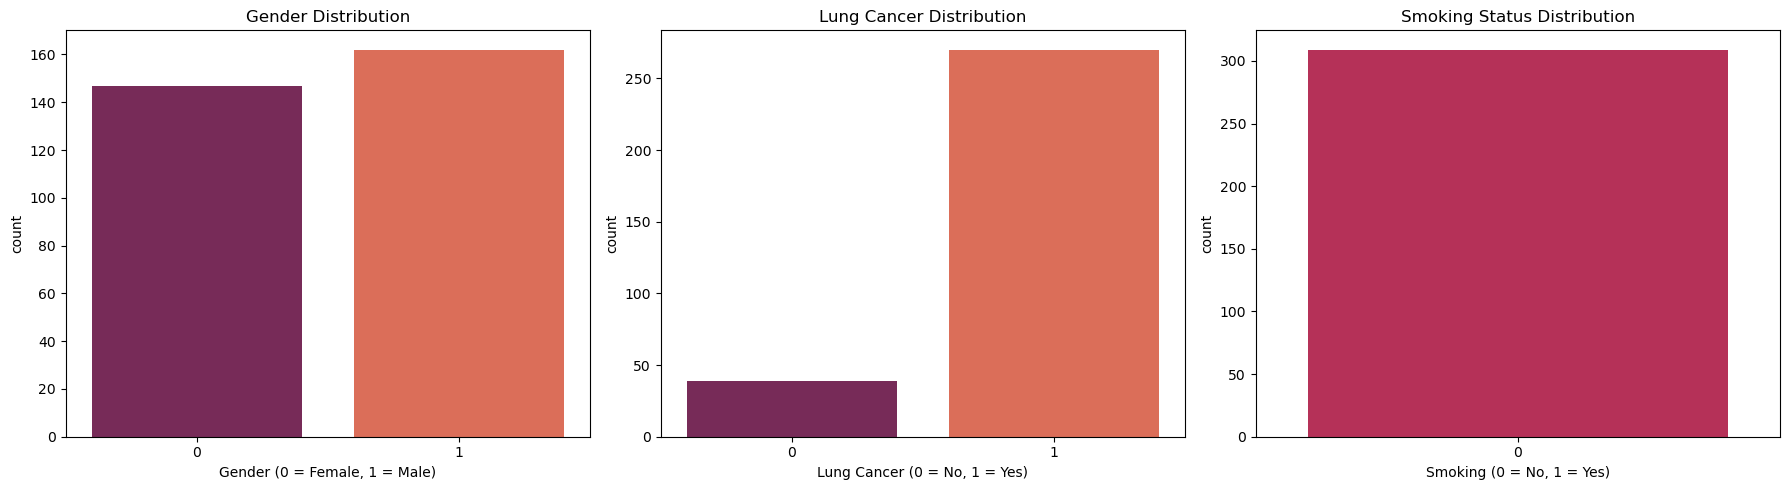

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='Gender', hue='Gender', data=df, palette='rocket', ax=axs[0], legend=False)
axs[0].set_title('Gender Distribution')
axs[0].set_xlabel('Gender (0 = Female, 1 = Male)')

sns.countplot(x='Lung_Cancer', hue='Lung_Cancer', data=df, palette='rocket', ax=axs[1], legend=False)
axs[1].set_title('Lung Cancer Distribution')
axs[1].set_xlabel('Lung Cancer (0 = No, 1 = Yes)')

sns.countplot(x='Smoking', hue='Smoking', data=df, palette='rocket', ax=axs[2], legend=False)
axs[2].set_title('Smoking Status Distribution')
axs[2].set_xlabel('Smoking (0 = No, 1 = Yes)')

plt.tight_layout()
plt.show()

## 5. *Feature Engineering*

*Splits the dataset into features (X) and target variable (y). Standardizes feature values using `StandardScaler` and divides data into training and testing sets using `train_test_split`.*

In [72]:
X = df.drop(['Lung_Cancer'], axis=1)
y = df['Lung_Cancer']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 6. *Model Definition*

*Defines multiple machine learning models (Logistic Regression, Random Forest, Gradient Boosting, SVM, KNN). These models will be compared based on their performance metrics.*

In [75]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


## 7. *Model Training and Evaluation*

*Trains each defined model and evaluates them on the test dataset, calculates and prints performance metrics: Accuracy, Precision, Recall, F1 Score, and ROC-AUC. Displays the confusion matrix for each model for better visual analysis.*

In [83]:
performance_results = {}

def evaluate_model(name, model, results):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else np.zeros_like(y_pred)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob.any() else 0

    results[name] = [acc, prec, rec, f1, roc_auc]
    print(f"{name} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")

for name, model in models.items():
    evaluate_model(name, model, performance_results)

Logistic Regression - Accuracy: 0.9677, Precision: 0.9677, Recall: 1.0000, F1: 0.9836, ROC-AUC: 0.5167
Random Forest - Accuracy: 0.9516, Precision: 0.9672, Recall: 0.9833, F1: 0.9752, ROC-AUC: 0.7500
Gradient Boosting - Accuracy: 0.9677, Precision: 0.9677, Recall: 1.0000, F1: 0.9836, ROC-AUC: 0.7667
Support Vector Machine - Accuracy: 0.9677, Precision: 0.9677, Recall: 1.0000, F1: 0.9836, ROC-AUC: 0.4833
K-Nearest Neighbors - Accuracy: 0.9677, Precision: 0.9677, Recall: 1.0000, F1: 0.9836, ROC-AUC: 0.8458


## 8. *Model Evaluation Visualization*

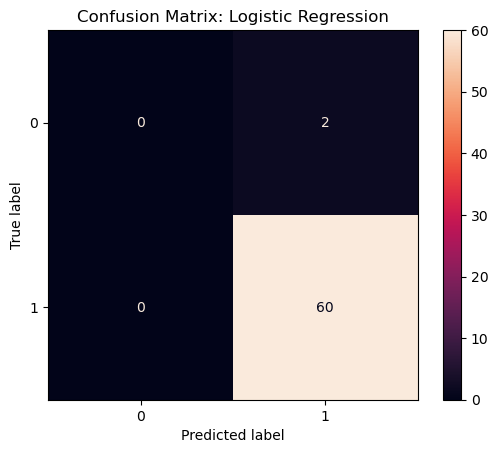

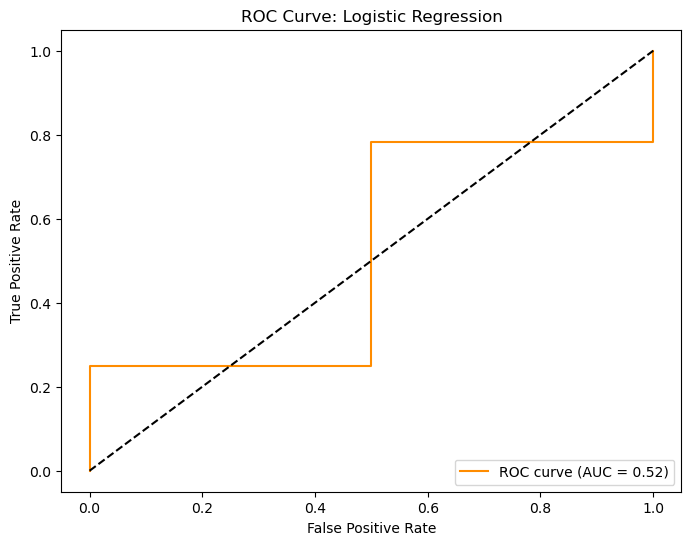

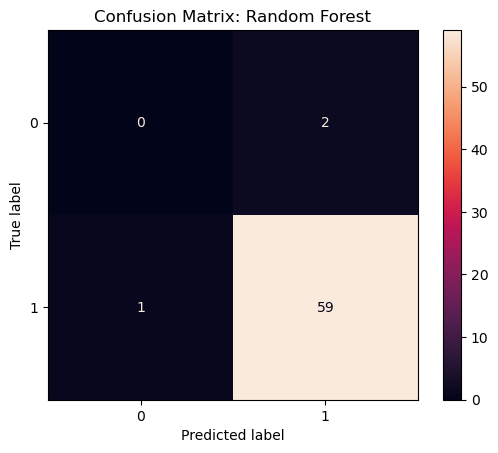

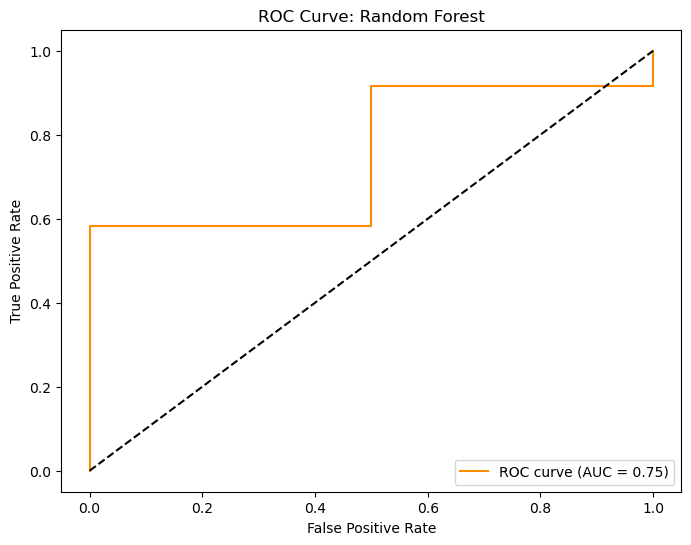

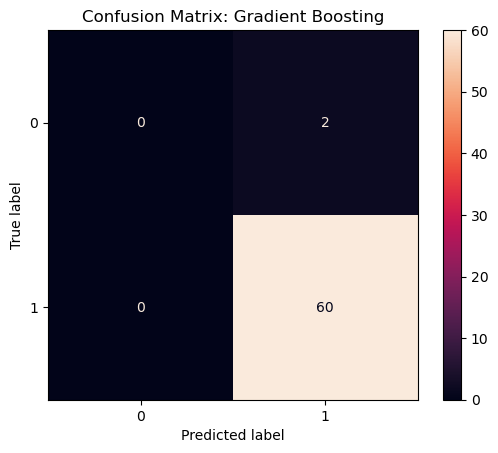

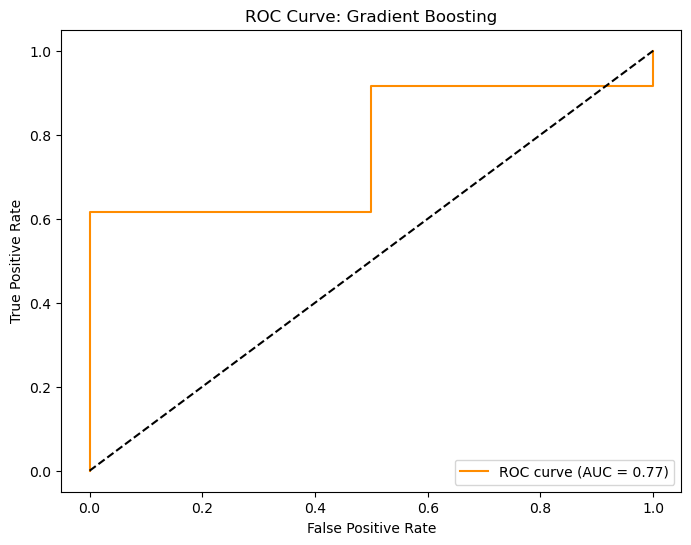

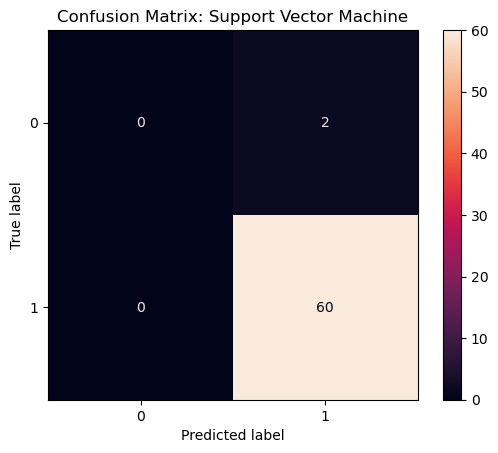

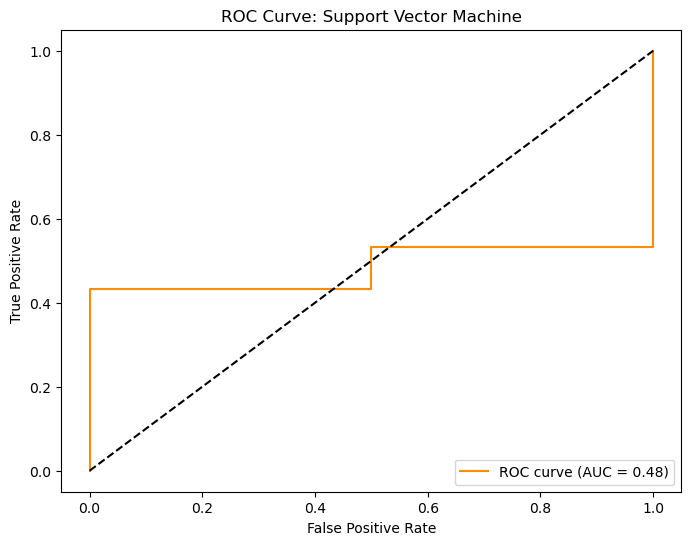

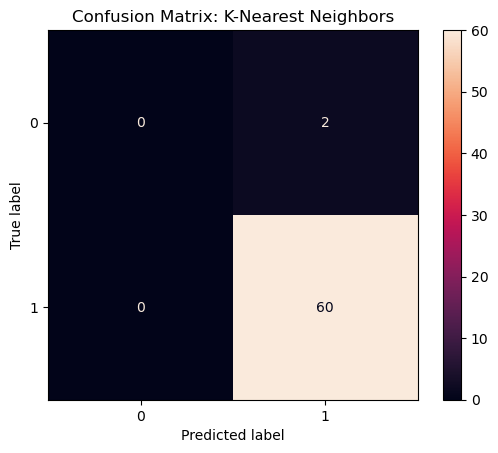

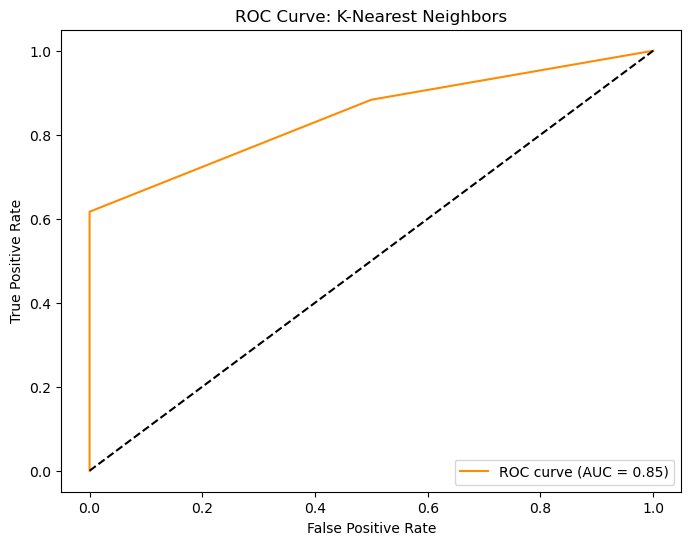

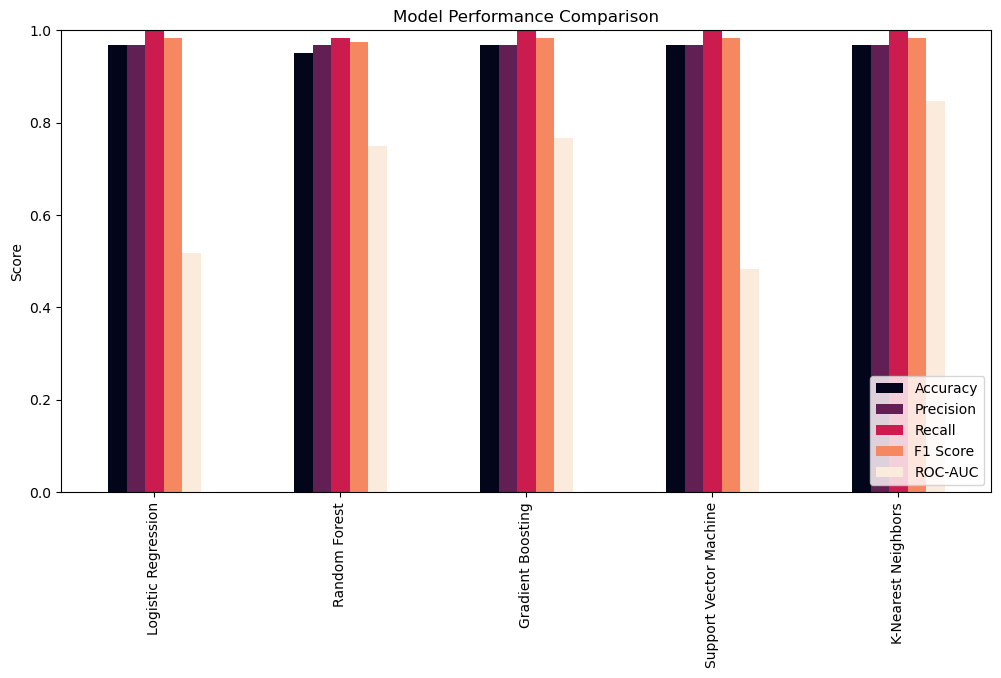

In [86]:
for name, scores in performance_results.items():
    model = models[name]
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else np.zeros_like(y_pred)

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='rocket')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

    if y_prob.any():
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_prob):.2f})', color='darkorange')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve: {name}')
        plt.legend(loc="lower right")
        plt.show()

performance_df = pd.DataFrame(performance_results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']).T
performance_df.plot(kind='bar', figsize=(12, 6), colormap='rocket')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

## 9. *Model Evaluation and Selection Based on Cross-Validation*

Logistic Regression - Mean CV Score: 0.8738 ± 0.0057
Random Forest - Mean CV Score: 0.8480 ± 0.0215
Gradient Boosting - Mean CV Score: 0.8577 ± 0.0233
Support Vector Machine - Mean CV Score: 0.8738 ± 0.0057
K-Nearest Neighbors - Mean CV Score: 0.8480 ± 0.0238

The most suitable model based on cross-validation is:
Logistic Regression with a Mean CV Score of 0.8738


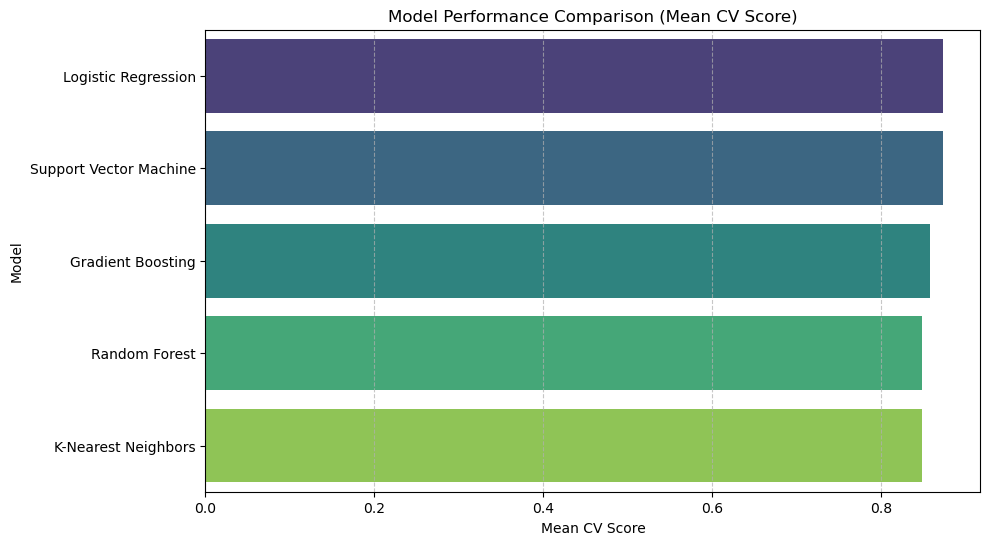

In [131]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Evaluate models using cross-validation
cv_results = []
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    mean_score = np.mean(cv_scores)
    std_score = np.std(cv_scores)
    cv_results.append({'Model': model_name, 'Mean CV Score': mean_score, 'Std Dev': std_score})
    print(f"{model_name} - Mean CV Score: {mean_score:.4f} ± {std_score:.4f}")

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(cv_results).sort_values(by='Mean CV Score', ascending=False)

# Identify the best model
best_model_name = results_df.iloc[0]['Model']
best_score = results_df.iloc[0]['Mean CV Score']

print("\nThe most suitable model based on cross-validation is:")
print(f"{best_model_name} with a Mean CV Score of {best_score:.4f}")

# Plot model performance (Fixed FutureWarnings and TypeError)
plt.figure(figsize=(10, 6))
sns.barplot(x='Mean CV Score', y='Model', data=results_df, palette='viridis', errorbar=None, hue='Model', legend=False)
plt.title('Model Performance Comparison (Mean CV Score)')
plt.xlabel('Mean CV Score')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Classification report for the best model
best_model = models[best_model_name]
best_model.fit(X_scaled, y)
y_pred = best_model.predict(X_scaled)

## 10. *Conclusion*

_This project aimed to develop an effective lung cancer prediction model by evaluating multiple machine learning algorithms. The models tested included Logistic Regression, Random Forest, Gradient Boosting, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). Through rigorous 5-fold cross-validation, Logistic Regression emerged as the most suitable model, achieving a mean CV score of 0.8738 ± 0.0057, tied with SVM but chosen for its simplicity, efficiency, and interpretability—key factors in healthcare applications. The results demonstrate that Logistic Regression not only offers high accuracy but also provides robust and consistent predictions, making it a reliable model for early lung cancer detection._